# Rodrigo Dias Castelhano

## Análise temporal para a pandemia COVID - 19 no Brasil 

### Comparações a partir do caso 50

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
sns.set(style="darkgrid")
%matplotlib inline  

In [112]:
mundo=pd.read_csv('covid_19_data.csv',sep=',', encoding='utf-8') # Importando dados sobre o Mundo

mundo['ObservationDate'] = pd.to_datetime(mundo['ObservationDate'], errors='coerce') # transformação data e index
st_mundo = mundo.set_index('ObservationDate')
st_mundo.tail(5)

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-03-24,8505,Wuhan Evacuee,US,2020-03-24 23:41:50,4.0,0.0,0.0
2020-03-24,8506,Wyoming,US,2020-03-24 23:41:50,29.0,0.0,0.0
2020-03-24,8507,Xinjiang,Mainland China,2020-03-24 23:41:50,76.0,3.0,73.0
2020-03-24,8508,Yunnan,Mainland China,2020-03-24 23:41:50,176.0,2.0,172.0
2020-03-24,8509,Zhejiang,Mainland China,2020-03-24 23:41:50,1240.0,1.0,1221.0


In [113]:
brasil=pd.read_csv('brazil_covid19.csv',sep=',', encoding='utf-8') # Importando dados sobre o Brasil

brasil['date'] = pd.to_datetime(brasil['date'], errors='coerce') # transformação data e index
st_brasil = brasil.set_index('date')
st_brasil.tail(5)

,region,state,cases,deaths
date,,,,
2020-04-03,Sudeste,Rio de Janeiro,1074,47
2020-04-03,Sudeste,São Paulo,4048,219
2020-04-03,Sul,Paraná,301,4
2020-04-03,Sul,Rio Grande do Sul,396,5
2020-04-03,Sul,Santa Catarina,281,5


In [114]:
st_brasil = st_brasil.loc['2020-03-11':'2020-04-03'] # Selecionando periodo estudado até o mais recente no Brasil

brasil1 = st_brasil['cases'].resample('d').sum()
brasil_mortos = st_brasil['deaths'].resample('d').sum()
brasil1.shape

(24,)

In [158]:
mortalidade_br = brasil_mortos/brasil1 # Mortalidade Brasil
mortalidade_br.shape

(24,)

In [159]:
st_sp = st_brasil.loc[(st_brasil['state']=='São Paulo')] # Separando São Paulo

sp1 = st_sp['cases'].resample('d').sum()
sp_mortos = st_sp['deaths'].resample('d').sum()
sp_mortos.shape

(24,)

In [160]:
mortalidade_sp = sp_mortos/sp1 # Mortalidade São Paulo
mortalidade_sp.shape

(24,)

In [162]:
st_italia = st_mundo.loc[(st_mundo['Country/Region']=='Italy')] # Separando a Italia
italia_br = st_italia.loc['2020-02-22':'2020-03-16']

italia1 = italia_br['Confirmed'].resample('d').sum()
italia_mortos = italia_br['Deaths'].resample('d').sum()
italia1.shape

(24,)

In [163]:
mortalidade_it = italia_mortos/italia1 # Mortalidade Italia
mortalidade_it.shape

(24,)

In [164]:
st_alemanha = st_mundo.loc[(st_mundo['Country/Region']=='Germany')] # Separando a Alemanha
st_alemanha = st_alemanha.loc['2020-02-29':'2020-03-23']

alemanha1 = st_alemanha['Confirmed'].resample('d').sum()
alemanha_mortos = st_alemanha['Deaths'].resample('d').sum()
alemanha1.shape

(24,)

In [165]:
st_espanha = st_mundo.loc[(st_mundo['Country/Region']=='Spain')] # Separando a Espanha
st_espanha = st_espanha.loc['2020-03-01':'2020-03-24']

espanha1 = st_espanha['Confirmed'].resample('d').sum()
espanha_mortos = st_espanha['Deaths'].resample('d').sum()
espanha_mortos.shape

(24,)

In [166]:
mortalidade_es = espanha_mortos/espanha1 # Mortalidade Espanha
mortalidade_es.shape

(24,)

## Agora o processo para colocar os dados em um único gráfico comparativo em que o inicio da contagem dos dias se da a partir do caso 50.

In [134]:
brasil2 = brasil1.reset_index() # resetando o indice 
italia2 = italia1.reset_index()
sp2 = sp1.reset_index()
alemanha2 = alemanha1.reset_index()
espanha2 = espanha1.reset_index()

df_brasil = pd.DataFrame(brasil2) # Transformando em DataFrame
df_italia = pd.DataFrame(italia2)
df_alemanha = pd.DataFrame(alemanha2)
df_sp = pd.DataFrame(sp2)
df_espanha = pd.DataFrame(espanha2)

In [57]:
brasil_m2 = brasil_mortos.reset_index() # Para as Mortes 
italia_m2 = italia_mortos.reset_index()
sp_m2 = sp_mortos.reset_index()
alemanha_m2 = alemanha_mortos.reset_index()
espanha_m2 = espanha_mortos.reset_index()

df_brasilm = pd.DataFrame(brasil_m2)
df_italiam = pd.DataFrame(italia_m2)
df_alemanham = pd.DataFrame(alemanha_m2)
df_spm = pd.DataFrame(sp_m2)
df_espanham = pd.DataFrame(espanha_m2)


In [66]:
brasil_m3 = mortalidade_br.reset_index() # Para a Mortalidade
italia_m3 = mortalidade_it.reset_index()
sp_m3 = mortalidade_sp.reset_index()
espanha_m3 = mortalidade_es.reset_index()

df_brasilm1 = pd.DataFrame(brasil_m3)
df_italiam1 = pd.DataFrame(italia_m3)
df_spm1 = pd.DataFrame(sp_m3)
df_espanham1 = pd.DataFrame(espanha_m3)

In [69]:
dia = ['dia_'+str(i) for i in range(len(italia2))] # Ajustando os indices para contar os dias Italia
df_italia.index = dia
base_italia = df_italia.reset_index()

dia = ['dia_'+str(i) for i in range(len(italia2))] # Mortos Italia 
df_italiam.index = dia
base_italiam = df_italiam.reset_index()

In [70]:
dia = ['dia_'+str(i) for i in range(len(brasil2))] # Brasil 
df_brasil.index = dia
base_brasil = df_brasil.reset_index()

dia = ['dia_'+str(i) for i in range(len(brasil2))] # Mortes Brasil
df_brasilm.index = dia
base_brasilm = df_brasilm.reset_index()

In [71]:
dia = ['dia_'+str(i) for i in range(len(alemanha2))] # Alemanha 
df_alemanha.index = dia
base_alemanha = df_alemanha.reset_index()

dia = ['dia_'+str(i) for i in range(len(alemanha2))] # Mortes Alemanha
df_alemanham.index = dia
base_alemanham = df_alemanham.reset_index()

In [72]:
dia = ['dia_'+str(i) for i in range(len(sp2))] # São Paulo
df_sp.index = dia
base_sp = df_sp.reset_index()

dia = ['dia_'+str(i) for i in range(len(sp2))] # Mortes São Paulo
df_spm.index = dia
base_spm = df_spm.reset_index()

In [73]:
dia = ['dia_'+str(i) for i in range(len(espanha2))] # Espanha 
df_espanha.index = dia
base_espanha = df_espanha.reset_index()

dia = ['dia_'+str(i) for i in range(len(espanha2))] # Mortes Espanha
df_espanham.index = dia
base_espanham = df_espanham.reset_index()


In [100]:
dia = ['dia_'+str(i) for i in range(len(espanha2))] # Mesmo processo para a mortalidade 
df_brasilm1.index = dia
base_brasil = df_brasilm1.reset_index()

dia = ['dia_'+str(i) for i in range(len(espanha2))]
df_spm1.index = dia
base_sp = df_spm1.reset_index()

dia = ['dia_'+str(i) for i in range(len(espanha2))]
df_italiam1.index = dia
base_italia = df_italiam1.reset_index()

dia = ['dia_'+str(i) for i in range(len(espanha2))]
df_espanham1.index = dia
base_espanha = df_espanham1.reset_index()

br = base_brasil.iloc[:,2]
sp = base_sp.iloc[:,2]
it = base_italia.iloc[:,2]
es = base_espanha.iloc[:,2]

In [25]:
# Juntando todos os DataFrames para comparar os casos confirmados 

juntos1=pd.merge(base_italia,base_brasil,how='inner',on='index')

juntos2=pd.merge(juntos1,base_alemanha,how='inner',on='index')
juntos2 = juntos2.rename(columns={'Confirmed_x': 'italia', 'cases': 'brasil', 'Confirmed_y': 'alemanha'})

juntos3=pd.merge(juntos2,base_sp,how='inner',on='index')
juntos = pd.merge(juntos3,base_espanha,how='inner',on='index')
juntos = juntos.rename(columns={'cases': 'são paulo', 'Confirmed': 'espanha'})
juntos.head(5)

,index,ObservationDate_x,italia,date_x,brasil,ObservationDate_y,alemanha,date_y,são paulo,ObservationDate,espanha
0,dia_0,2020-02-22,62.0,2020-03-11,52,2020-02-29,79.0,2020-03-11,30,2020-03-01,84.0
1,dia_1,2020-02-23,155.0,2020-03-12,77,2020-03-01,130.0,2020-03-12,42,2020-03-02,120.0
2,dia_2,2020-02-24,229.0,2020-03-13,98,2020-03-02,159.0,2020-03-13,56,2020-03-03,165.0
3,dia_3,2020-02-25,322.0,2020-03-14,121,2020-03-03,196.0,2020-03-14,65,2020-03-04,222.0
4,dia_4,2020-02-26,453.0,2020-03-15,200,2020-03-04,262.0,2020-03-15,136,2020-03-05,259.0


In [26]:
# Juntando todos os DataFrames para as Mortes 

juntos_mortos1 = pd.merge(base_italiam,base_brasilm,how='inner',on='index')

juntos_mortos2 = pd.merge(juntos_mortos1,base_alemanham,how='inner',on='index')
juntos_mortos2 = juntos_mortos2.rename(columns={'Deaths_x': 'Italia', 'deaths': 'Brasil', 'Deaths_y': 'Alemanha'})

juntos_mortos3 = pd.merge(juntos_mortos2,base_spm,how='inner',on='index')
juntos_mortos = pd.merge(juntos_mortos3,base_espanham,how='inner',on='index')
juntos_mortos = juntos_mortos.rename(columns={'deaths': 'São Paulo', 'Deaths': 'Espanha'})
juntos_mortos.head(5)


,index,ObservationDate_x,Italia,date_x,Brasil,ObservationDate_y,Alemanha,date_y,São Paulo,ObservationDate,Espanha
0,dia_0,2020-02-22,2.0,2020-03-11,0,2020-02-29,0.0,2020-03-11,0,2020-03-01,0.0
1,dia_1,2020-02-23,3.0,2020-03-12,0,2020-03-01,0.0,2020-03-12,0,2020-03-02,0.0
2,dia_2,2020-02-24,7.0,2020-03-13,0,2020-03-02,0.0,2020-03-13,0,2020-03-03,1.0
3,dia_3,2020-02-25,10.0,2020-03-14,0,2020-03-03,0.0,2020-03-14,0,2020-03-04,2.0
4,dia_4,2020-02-26,12.0,2020-03-15,0,2020-03-04,0.0,2020-03-15,0,2020-03-05,3.0


In [152]:
# Graficos de Comparação de Casos e de Mortes 

def comparação():

    par_fonte={'size':18,'fontweight':'light','family':'monospace','style':'normal'}
    par_fonte2={'size':25,'fontweight':'light','family':'monospace','style':'normal'}
    plt.rcParams['figure.dpi']=150
    plt.figure(figsize=(20, 10))

    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18

    plt.plot(juntos['italia'],marker='o', markersize=12, color='black',linewidth=0.7,linestyle='--',label='Italia')
    plt.plot(juntos['brasil'],marker='o', markersize=12, color='b',linewidth=0.7,linestyle='--',label='Brasil')
    plt.plot(juntos['alemanha'],marker='o', markersize=12, color='y',linewidth=0.7,linestyle='--',label='Alemanha')
    plt.plot(juntos['são paulo'],marker='o', markersize=12, color='g',linewidth=0.7,linestyle='--',label='São Paulo')
    plt.plot(juntos['espanha'],marker='o', markersize=12, color='r',linewidth=0.7,linestyle='--',label='Espanha')
    
    plt.grid(axis='x')
    plt.xlabel("Dias",par_fonte2)
    plt.ylabel("Casos Confirmados",par_fonte2)
    plt.yticks(np.arange(0, 40000, 2000))
    plt.legend(loc='upper left',prop={'size':30})
    plt.title('Casos Confirmados - Covid 19',par_fonte2)

    plt.show()
    
def comparação_mortos():

    par_fonte={'size':18,'fontweight':'light','family':'monospace','style':'normal'}
    par_fonte2={'size':25,'fontweight':'light','family':'monospace','style':'normal'}
    plt.rcParams['figure.dpi']=150
    plt.figure(figsize=(20, 10))

    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18

    plt.plot(juntos_mortos['Italia'],marker='o', markersize=12, color='black',linewidth=0.7,linestyle='--',label='Italia')
    plt.plot(juntos_mortos['Brasil'],marker='o', markersize=12, color='b',linewidth=0.7,linestyle='--',label='Brasil')
    plt.plot(juntos_mortos['Alemanha'],marker='o', markersize=12, color='y',linewidth=0.7,linestyle='--',label='Alemanha')
    plt.plot(juntos_mortos['São Paulo'],marker='o', markersize=12, color='g',linewidth=0.7,linestyle='--',label='São Paulo')
    plt.plot(juntos_mortos['Espanha'],marker='o', markersize=12, color='r',linewidth=0.7,linestyle='--',label='Espanha')
    
    plt.grid(axis='x')
    plt.xlabel("Dias",par_fonte2)
    plt.ylabel("Número de Mortos",par_fonte2)
    plt.yticks(np.arange(0, 2320, 100))
    plt.legend(loc='upper left',prop={'size':30})
    plt.title('Número de Mortos - Covid 19',par_fonte2)

    plt.show()    

## Esta é uma comparação otimista com relação a Itália, considera o inicio do periodo exponencial para os dois paises 

### Para chegar a este resultado utilizei nove periodos anteriores ao inicio da subida exponencial. Temos que considerar o problema da notificação dos casos que implicam na inclinação da curva. 
### O Segundo gráfico traz o inicio das estatísticas com mortes no mesmo período, parece que o Brasil inicia o periodo de mortes 8 periodos a frente da Italia, porém se compararmos os inicios parecem próximos. 

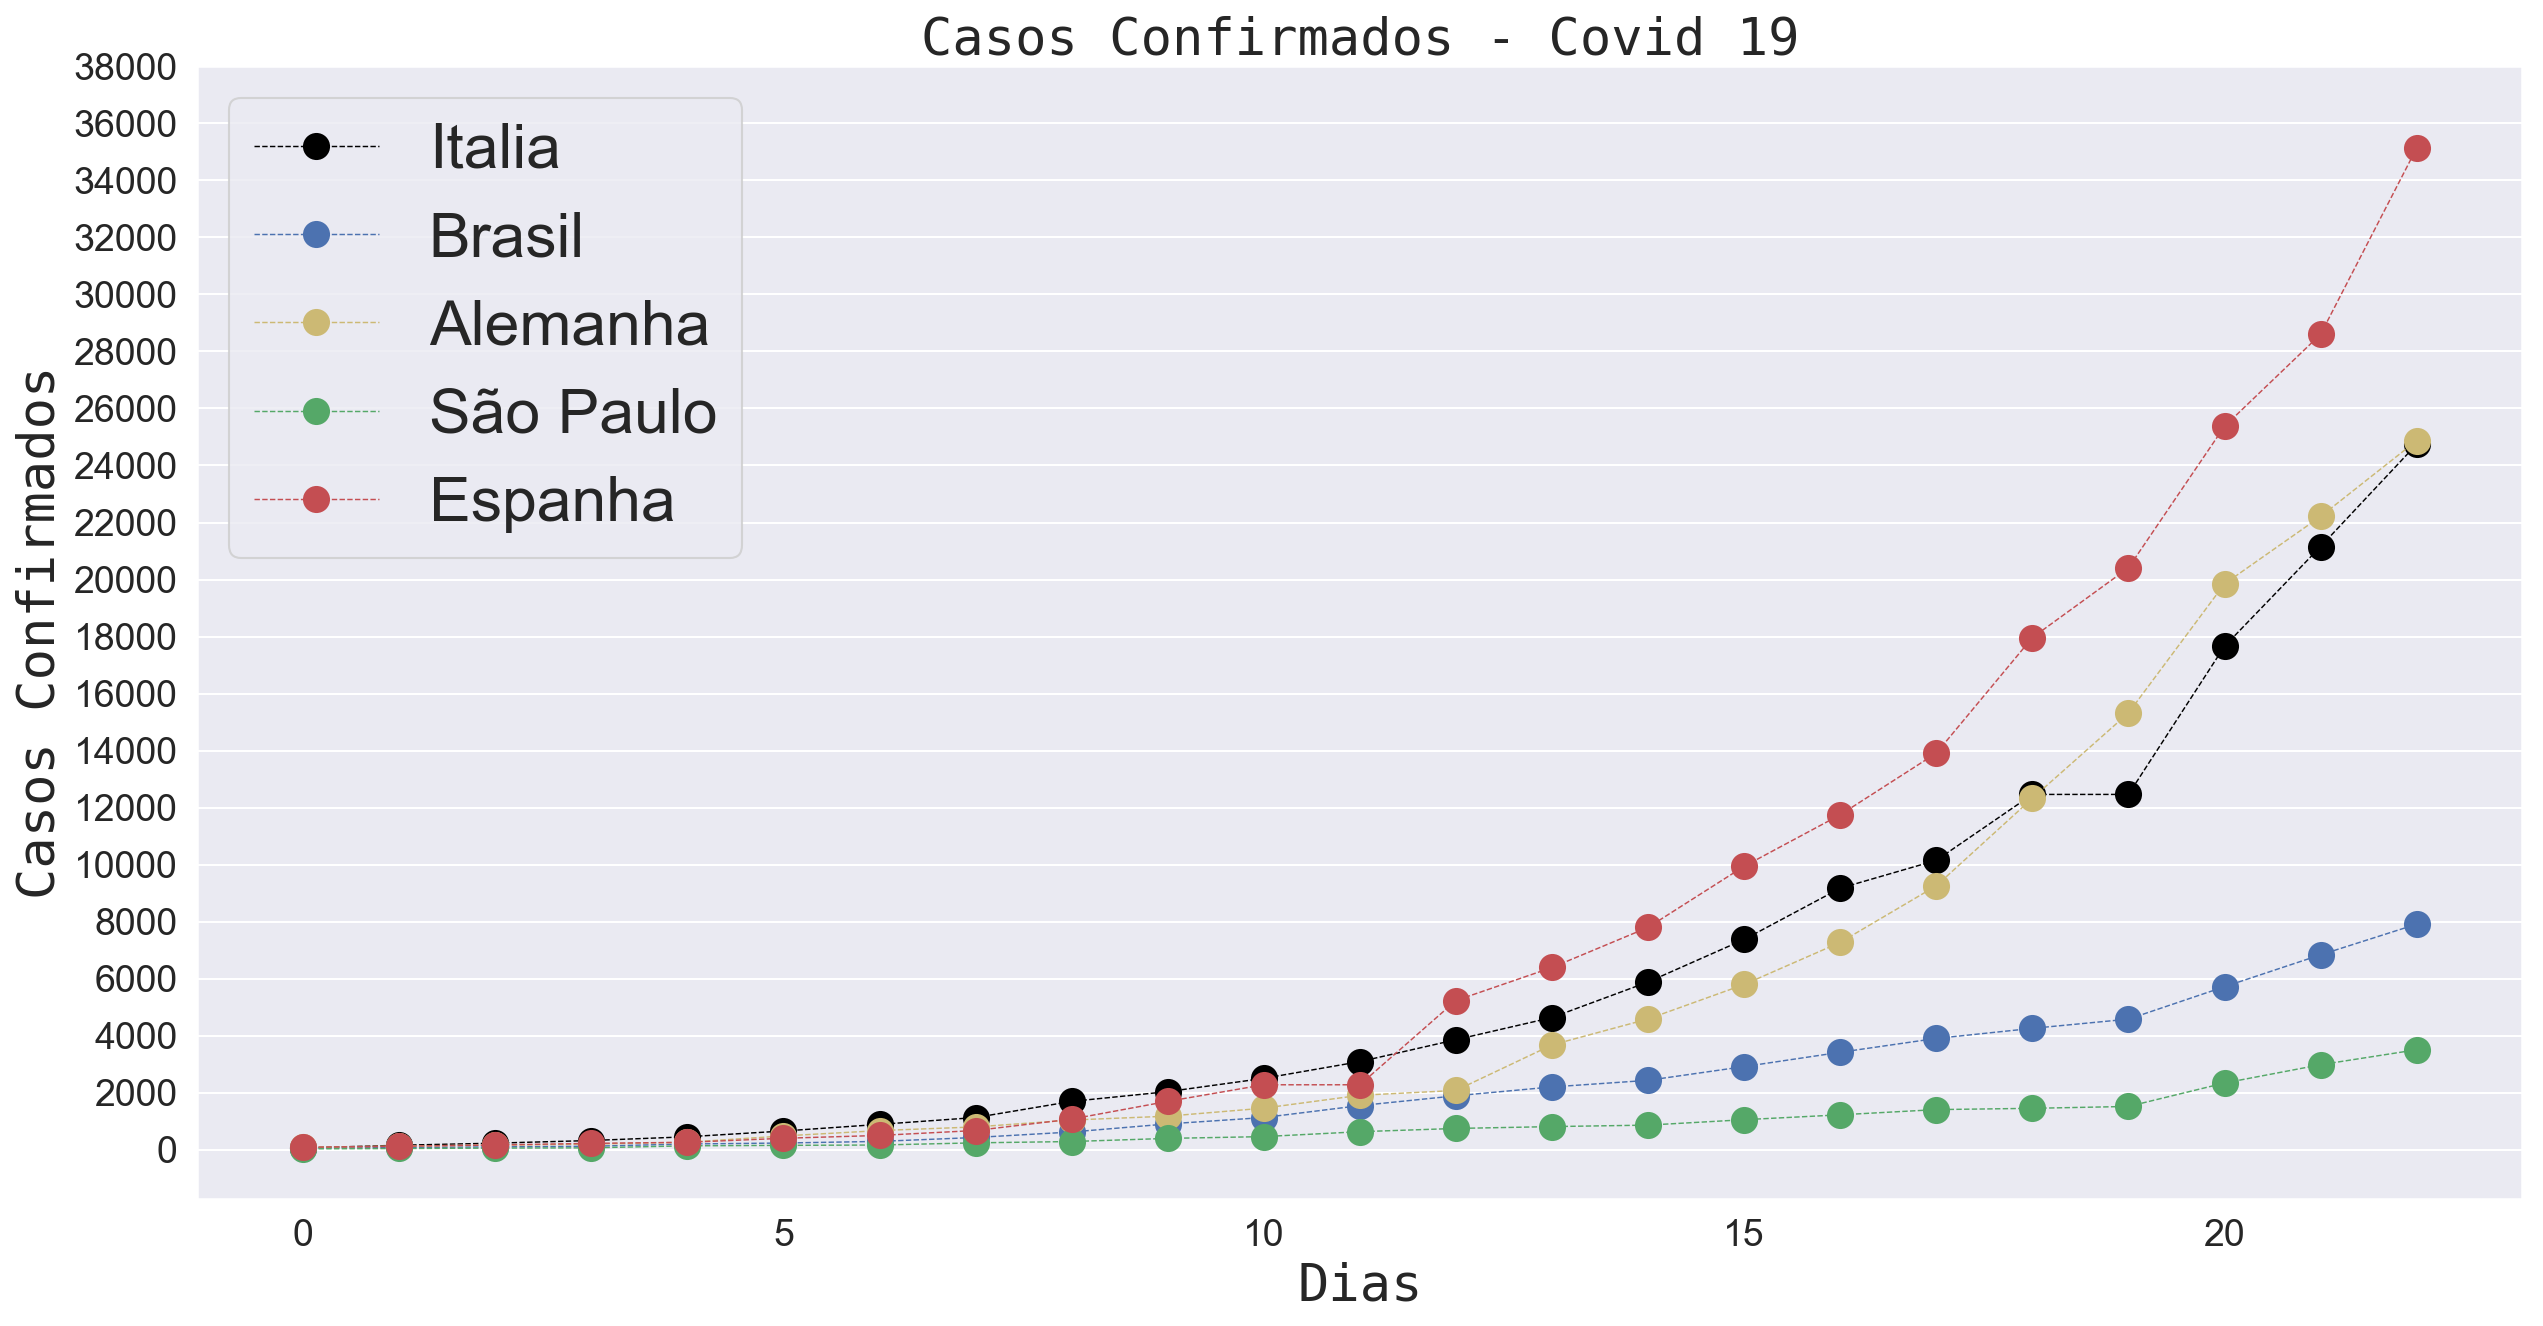

In [153]:
comparação()

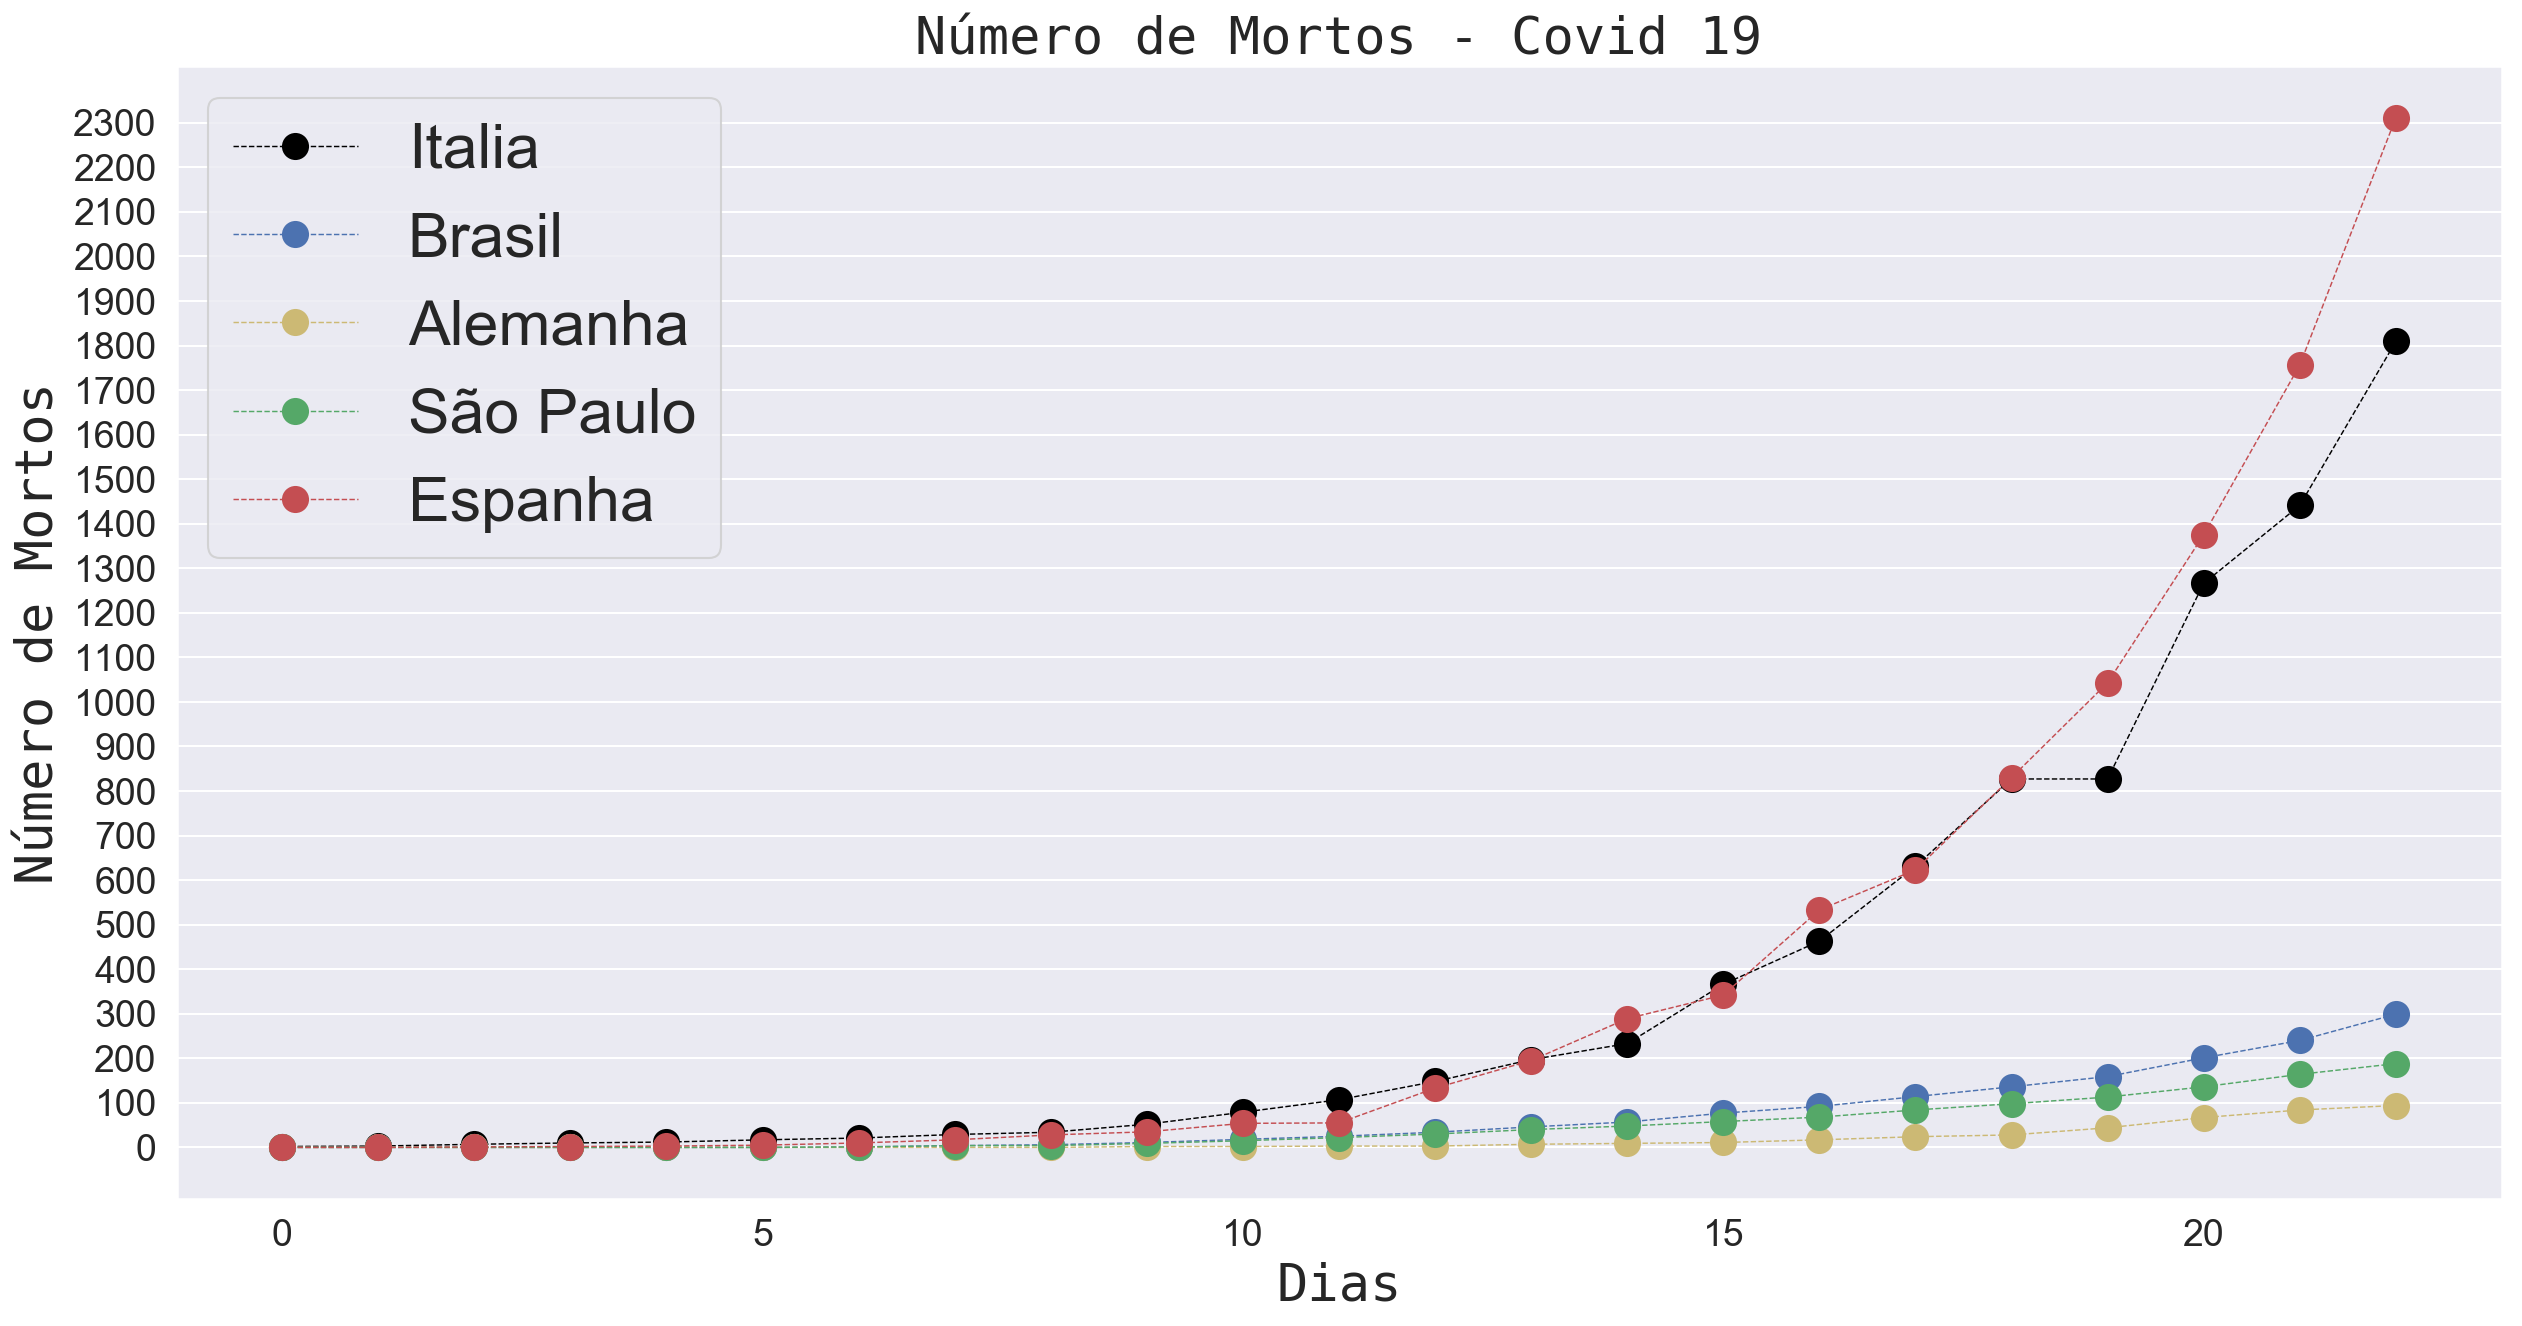

In [154]:
comparação_mortos()

In [32]:
t = df_italiam['Deaths'].astype(float)  # Tempo de Duplicação Italia - Mortes
tx = []
for i, num in enumerate(t):
    if t[i] != 0:
        if t[i] != t[i-1]:
            td = 70/((t[i]/t[i-1]-1)*100)
            tx.append(td)      
            
tx_italia = np.array(tx)

# Media Movel - Italia

def media_italia(a, n=4) :           
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

tdobra_italia = media_italia(tx_italia)
tdobra_italia
            

array([0.71438964, 1.76458333, 1.83458333, 2.44708333, 2.498125  ,
       2.638125  , 2.54868056, 2.14196759, 2.17634259, 1.61804991,
       1.81606578, 2.43666763, 2.24949658, 2.45309854, 2.40681878,
       2.01257275, 2.03566351, 2.64135423, 2.84432071])

In [33]:
t = df_brasilm['deaths'].astype(float) # Brasil 
tx = []
for i, num in enumerate(t):
    if t[i] != 0:
        if t[i] != t[i-1]:
            td = 70/((t[i]/t[i-1]-1)*100)
            tx.append(td)      
            
tx_brasil = np.array(tx)

def media_brasil(a, n=4) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

tdobra_brasil = media_brasil(tx_brasil)
tdobra_brasil
            

C:\Users\rodri\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


array([0.61833333, 0.89333333, 1.285     , 1.42111111, 1.70694444,
       2.16376263, 2.21251263, 2.62473485, 2.8607197 , 3.0357197 ,
       3.57175231, 3.33591897, 3.50602387, 3.31107009])

In [34]:
t = df_alemanham['Deaths'].astype(float) # Alemanha
tx = []
for i, num in enumerate(t):
    if t[i] != 0:
        if t[i] != t[i-1]:
            td = 70/((t[i]/t[i-1]-1)*100)
            tx.append(td)      
            
tx_alemanha = np.array(tx)

def media_alemanha(a, n=4) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

tdobra_alemanha = media_alemanha(tx_alemanha)
tdobra_alemanha

C:\Users\rodri\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


array([1.09375   , 1.88125   , 1.85208333, 2.14583333, 2.58333333,
       2.10208333, 2.11603261, 2.38073849, 2.80073849])

In [35]:
t = df_espanham['Deaths'].astype(float) # Espanha 
tx = []
for i, num in enumerate(t):
    if t[i] != 0:
        if t[i] != t[i-1]:
            td = 70/((t[i]/t[i-1]-1)*100)
            tx.append(td)      
            
tx_espanha = np.array(tx)

def media_espanha(a, n=4) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

tdobra_espanha = media_espanha(tx_espanha)
tdobra_espanha

C:\Users\rodri\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


array([ 0.7875    ,  0.9625    ,  1.0375    ,  0.95795455,  1.39545455,
        1.54282297, 10.74282297, 10.59576586, 10.27116908, 10.31183258,
        1.81607786,  2.00603121,  2.66701687,  2.83067578,  2.55835538,
        2.79477869,  2.38995148,  2.41695435])

In [36]:
t = df_spm['deaths'].astype(float) # São Paulo
tx = []
for i, num in enumerate(t):
    if t[i] != 0:
        if t[i] != t[i-1]:
            td = 70/((t[i]/t[i-1]-1)*100)
            tx.append(td)      
            
tx_sp = np.array(tx)

def media_sp(a, n=4) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

tdobra_sp = media_sp(tx_sp)
tdobra_sp

C:\Users\rodri\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


array([0.46083333, 0.83583333, 1.25875   , 1.64375   , 2.25625   ,
       2.72125   , 3.255     , 3.47375   , 3.64875   , 3.95208333,
       3.79686594, 3.90311594, 4.04894928])

In [37]:
def tempos(): # Grafico de tempo de duplicação de mortes 

    par_fonte={'size':18,'fontweight':'light','family':'monospace','style':'normal'}
    par_fonte2={'size':25,'fontweight':'light','family':'monospace','style':'normal'}
    plt.rcParams['figure.dpi']=150
    plt.figure(figsize=(20, 10))

    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18

    plt.plot(tdobra_italia,marker='o', markersize=12, color='black',linewidth=0.7,linestyle='--',label='Italia')
    plt.plot(tdobra_brasil,marker='o', markersize=12, color='b',linewidth=0.7,linestyle='--',label='Brasil')
    #plt.plot(tdobra_alemanha,marker='o', markersize=12, color='g',linewidth=0.7,linestyle='--',label='Alemanha')
    plt.plot(tdobra_sp,marker='o', markersize=12, color='r',linewidth=0.7,linestyle='--',label='São Paulo')
    
    plt.grid(axis='x')
    plt.xlabel("Dias",par_fonte2)
    plt.ylabel("Duplicação em Dias",par_fonte2)
    plt.legend(loc='lower right',prop={'size':30})
    plt.title('Tempo de Duplicação de Mortes (Velocidade)',par_fonte2)

    plt.show()   


In [62]:
def mortalidade(): # Grafico de Mortalidade 

    par_fonte={'size':18,'fontweight':'light','family':'monospace','style':'normal'}
    par_fonte2={'size':25,'fontweight':'light','family':'monospace','style':'normal'}
    plt.rcParams['figure.dpi']=150
    plt.figure(figsize=(20, 10))

    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18

    plt.plot(mortalidade_it,marker='o', markersize=12, color='black',linewidth=0.7,linestyle='--',label='Italia')
    plt.plot(mortalidade_br,marker='o', markersize=12, color='b',linewidth=0.7,linestyle='--',label='Brasil')
    plt.plot(mortalidade_sp,marker='o', markersize=12, color='y',linewidth=0.7,linestyle='--',label='São Paulo')
    plt.plot(mortalidade_es,marker='o', markersize=12, color='g',linewidth=0.7,linestyle='--',label='Espanha')
        
    plt.grid(axis='x')
    plt.xlabel("Data",par_fonte2)
    plt.ylabel("Taxa de Mortalidade",par_fonte2)
    plt.legend(loc='upper left',prop={'size':30})
    plt.title('Mortalidade - Covid 19',par_fonte2)

    plt.show()

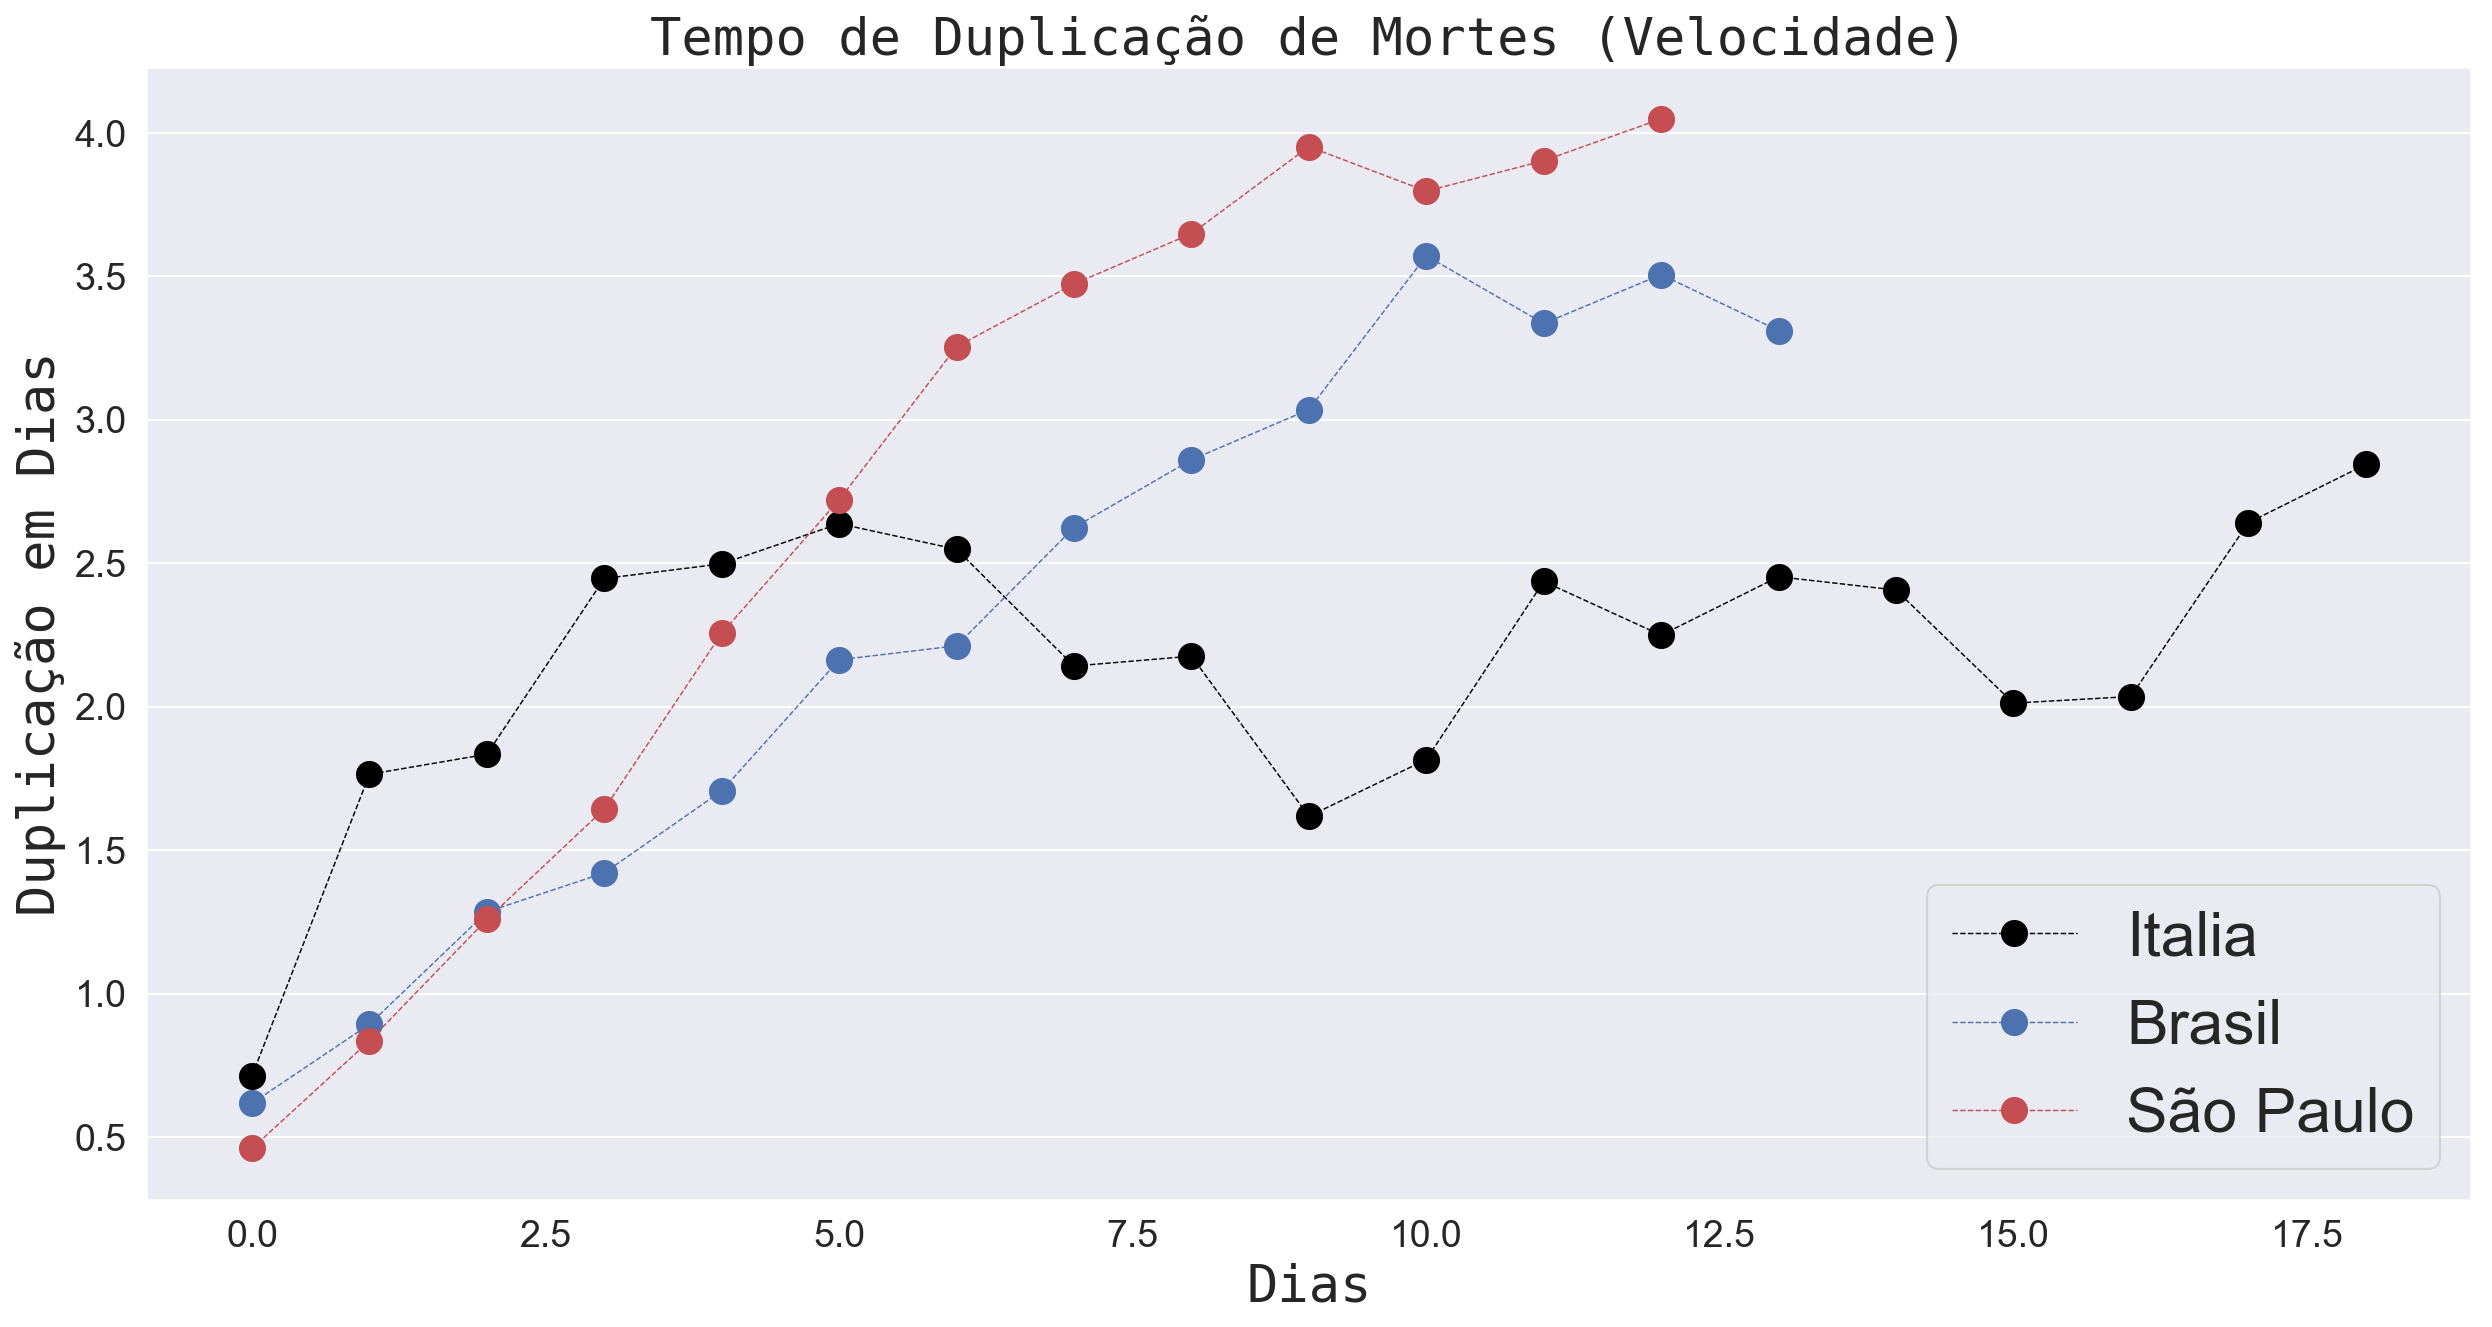

In [155]:
tempos()

In [156]:
def mortalidade():
    par_fonte={'size':18,'fontweight':'light','family':'monospace','style':'normal'}
    par_fonte2={'size':25,'fontweight':'light','family':'monospace','style':'normal'}
    plt.rcParams['figure.dpi']=150
    plt.figure(figsize=(20, 10))

    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18

    plt.plot(it,marker='o', markersize=12, color='black',linewidth=0.7,linestyle='--',label='Italia')
    plt.plot(br,marker='o', markersize=12, color='b',linewidth=0.7,linestyle='--',label='Brasil')
    plt.plot(sp,marker='o', markersize=12, color='r',linewidth=0.7,linestyle='--',label='São Paulo')
    plt.plot(es,marker='o', markersize=12, color='g',linewidth=0.7,linestyle='--',label='Espanha')
    
    plt.grid(axis='x')
    plt.xlabel("Dias",par_fonte2)
    plt.ylabel("Taxa de Mortalidade",par_fonte2)
    plt.yticks(np.arange(0, 0.1, 0.02))
    plt.legend(loc='upper left',prop={'size':30})
    plt.title('Evolução Taxa de Mortalidade - Covid 19',par_fonte2)

    plt.show()
    

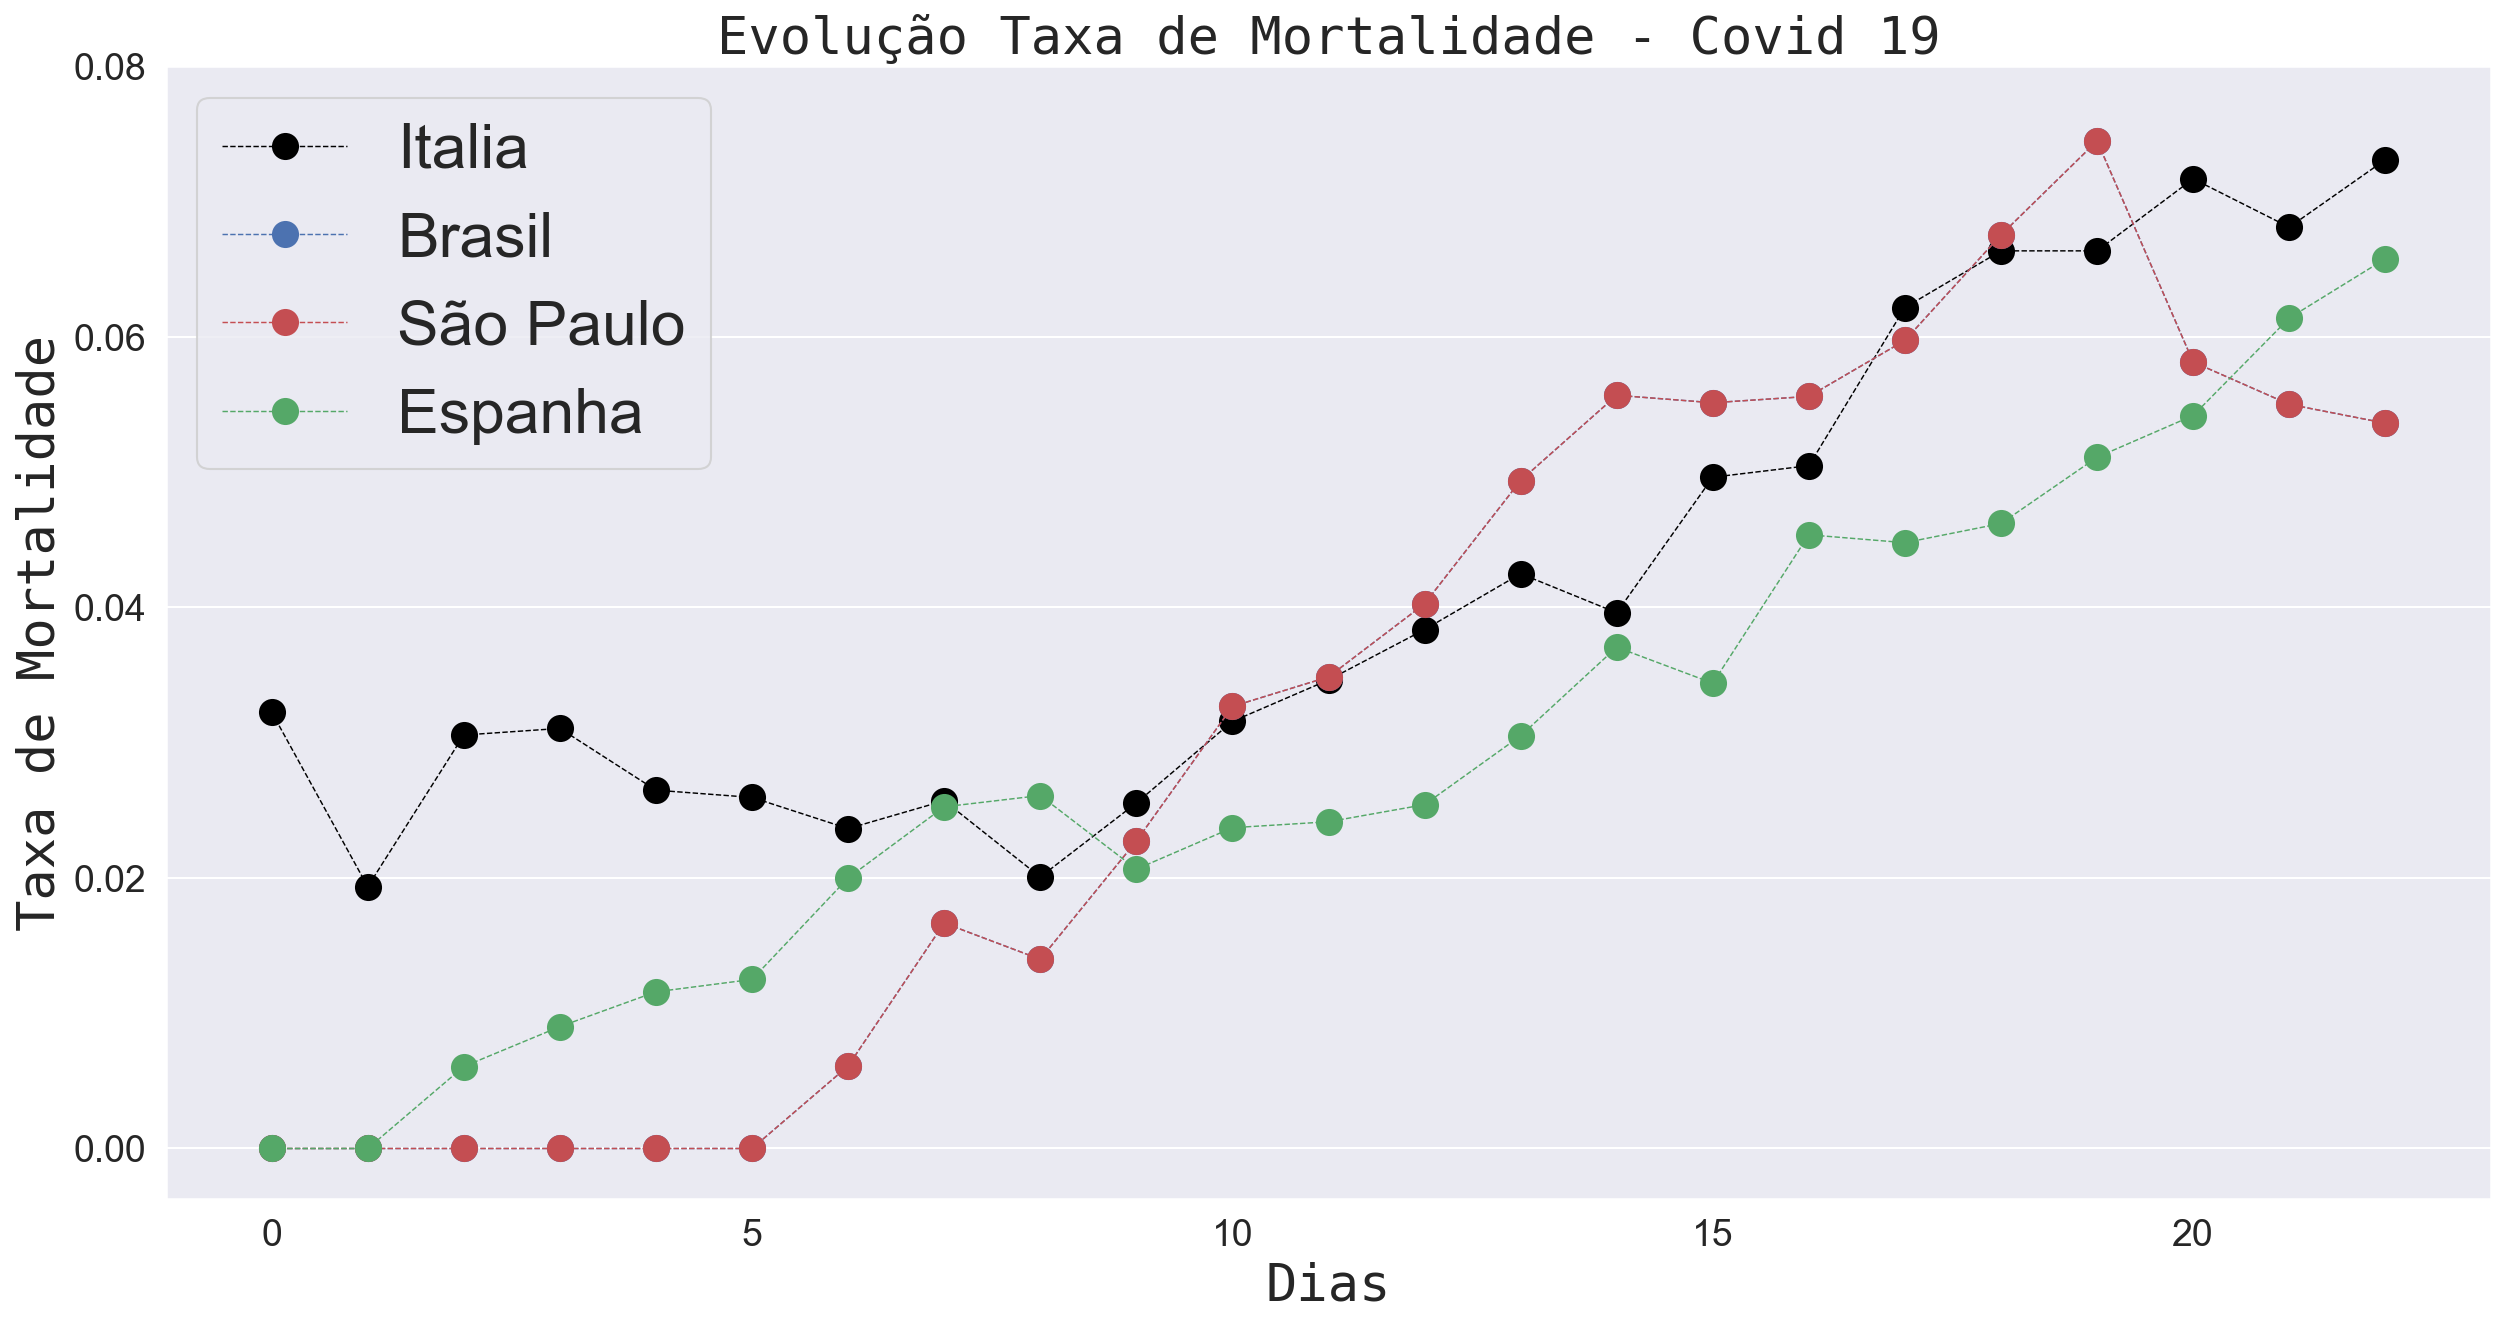

In [157]:
mortalidade()